In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
import scipy

In [2]:
path = 'ASTROSFINAL.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,date,sum_crimes,weekday,month,mode_hr,game,seasons
0,2010-01-01,18,Friday,Jan,0,No Game,No game
1,2010-01-02,13,Saturday,Jan,14,No Game,No game
2,2010-01-03,12,Sunday,Jan,0,No Game,No game
3,2010-01-04,9,Monday,Jan,14,No Game,No game
4,2010-01-05,8,Tuesday,Jan,2,No Game,No game


In [5]:
#df.drop(['date','seasons','month','weekday'], axis=1, inplace=True)
df.drop(['date'], axis=1, inplace=True)

df.head()

,sum_crimes,weekday,month,mode_hr,game,seasons
0,18,Friday,Jan,0,No Game,No game
1,13,Saturday,Jan,14,No Game,No game
2,12,Sunday,Jan,0,No Game,No game
3,9,Monday,Jan,14,No Game,No game
4,8,Tuesday,Jan,2,No Game,No game


In [6]:
dft = df.copy()

In [7]:
encoder = preprocessing.LabelEncoder()
dft["weekday"] = encoder.fit_transform(dft["weekday"].fillna('Nan'))
dft["month"] = encoder.fit_transform(dft["month"].fillna('Nan'))
dft["game"] = encoder.fit_transform(dft["game"].fillna('Nan'))
dft["seasons"] = encoder.fit_transform(dft["seasons"].fillna('Nan'))

dft.head()

,sum_crimes,weekday,month,mode_hr,game,seasons
0,18,0,4,0,1,0
1,13,2,4,14,1,0
2,12,3,4,0,1,0
3,9,1,4,14,1,0
4,8,5,4,2,1,0


In [8]:
dft.game.unique()

array([1, 0, 2])

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [10]:
knn = KNeighborsClassifier(n_neighbors=6)

In [11]:
X = dft.drop('game', axis=1).values
y = dft['game'].values

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=21, stratify=y)

In [13]:
knn= KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Test set predicitons:\n {}'.format(y_pred))

Test set predicitons:
 [0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 2 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1

In [14]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris['data']  #features, must be continous values and not categories, no missing values in data
y = iris['target']# target


knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [ ]:
# random array given by datacamp, create a datafame to match video
xnew = np.array([[ 0.27585481,  0.57973138,  0.22589613,  0.17094405,  0.95218152,
         0.98929183,  0.80777923,  0.59599303,  0.42763355,  0.71024087,
         0.26041508,  0.81899981,  0.89039443,  0.29320816,  0.94901142,
         0.56394409]])
X_new = pd.DataFrame(xnew)  # create df

In [ ]:
X_new.shape

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,
                                                  random_state=21, stratify=y)

knn= KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Test set predicitons:\n {}'.format(y_pred))

Test set predicitons:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [16]:
knn.score(X_test,y_test)  # 95% is good for an out-of-the-box model !


0.9555555555555556

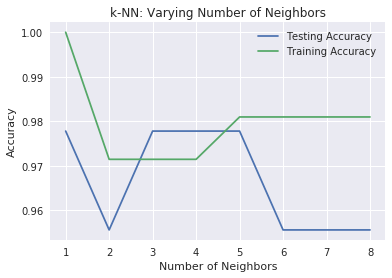

In [18]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()